In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [4]:
data = pd.read_csv('shoppdata.csv')
data = data.dropna() #remove null row
data.head() #display default row data

,UserId,ProductId,Rating,Timestamp,Prize,Campany
0,A39HTATAQ9V7YF,205616461,5,1369699200,13000,Amazon
1,A3JM6GV9MNOF9X,558925278,3,1355443200,1200,Fipkard
2,A1Z513UWSAAO0F,558925278,5,1404691200,23000,E-mart
3,A1WMRR494NWEWV,733001998,4,1382572800,4000,Myntra
4,A3IAAVS479H7M7,737104473,1,1274227200,3000,Snapdeal


In [5]:
data.head(1) #paricular row

,UserId,ProductId,Rating,Timestamp,Prize,Campany
0,A39HTATAQ9V7YF,205616461,5,1369699200,13000,Amazon


In [14]:
data.duplicated() #remove dulpicate

0      False
1      False
2      False
3      False
4      False
       ...  
128    False
129    False
130    False
131    False
132    False
Length: 133, dtype: bool

In [15]:
data.head() #show data

,UserId,ProductId,Rating,Timestamp,Prize,Campany
0,A39HTATAQ9V7YF,205616461,5,1369699200,13000,Amazon
1,A3JM6GV9MNOF9X,558925278,3,1355443200,1200,Fipkard
2,A1Z513UWSAAO0F,558925278,5,1404691200,23000,E-mart
3,A1WMRR494NWEWV,733001998,4,1382572800,4000,Myntra
4,A3IAAVS479H7M7,737104473,1,1274227200,3000,Snapdeal


In [16]:
# display all columns
pd.set_option('display.max_columns', None)
print(data)

             UserId   ProductId  Rating   Timestamp  Prize     Campany
0    A39HTATAQ9V7YF   205616461       5  1369699200  13000      Amazon
1    A3JM6GV9MNOF9X   558925278       3  1355443200   1200     Fipkard
2    A1Z513UWSAAO0F   558925278       5  1404691200  23000      E-mart
3    A1WMRR494NWEWV   733001998       4  1382572800   4000      Myntra
4    A3IAAVS479H7M7   737104473       1  1274227200   3000    Snapdeal
..              ...         ...     ...         ...    ...         ...
128  A2BQ8DVGEGWAFY  1929099886       4  1355011200   2058      Myntra
129  A2A0EW34FZH9Z7  1987958179       5  1394755200   2059    Snapdeal
130  A1D6UAVLQUS41B  3222000565       5  1381449600   2060  AliExpress
131  A2VRUBSVHDDOU9  3222000565       5  1382486400   2061      Amazon
132  A276N142RFK6EF  3222000565       5  1404345600   2062     Fipkard

[133 rows x 6 columns]


In [18]:
data.shape #display number of row and col. in dataset

(133, 6)

In [21]:
# flitering data  popular product
popular_products = pd.DataFrame(data.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
1304351475,16
1403790965,11
1304482685,6
1412759676,6
1304622657,4
1572671203,4
1304622622,3
1304511081,3
1304511111,3


<Axes: xlabel='ProductId'>

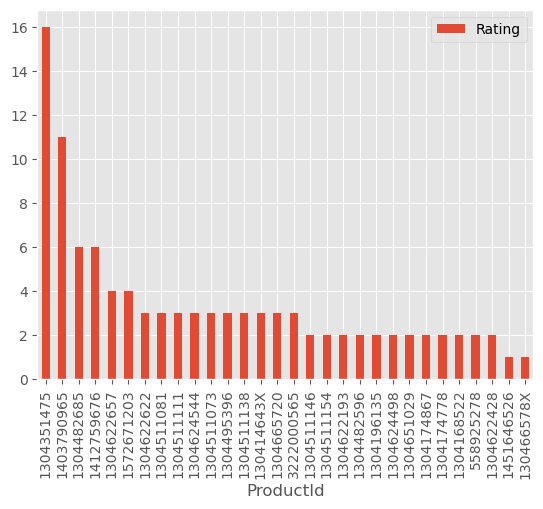

In [19]:
most_popular.head(30).plot(kind = "bar")

In [30]:
# flitering data  shopping platform
popular_com = pd.DataFrame(data.groupby('Campany')['Rating'].count())
most_com = popular_com.sort_values('Rating', ascending=False)
most_com.head(10)

,Rating
Campany,
Amazon,23
AliExpress,21
Myntra,21
Filpcard,19
Fipkard,18
E-mart,17
Snapdeal,14


<Axes: xlabel='Shopping platform', ylabel='Rating'>

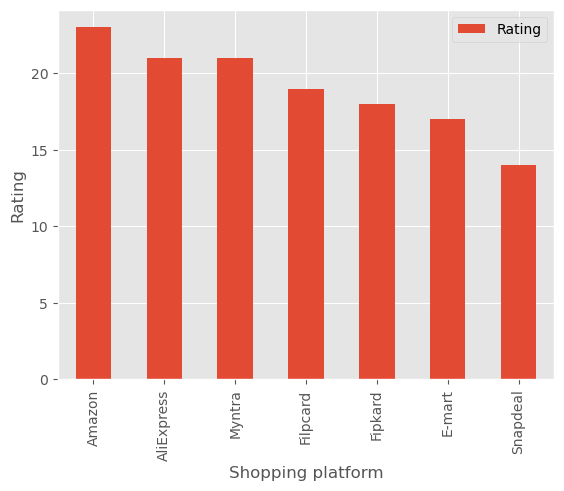

In [33]:
most_com.head(30).plot(kind = "bar",ylabel="Rating",xlabel="Shopping platform")

In [40]:
 # flitering data User Id 
popular_u = pd.DataFrame(data.groupby('UserId')['Rating'].count())
most_u = popular_u.sort_values('Rating', ascending=False)
most_u.head(10)

,Rating
UserId,
A1BG8QW55XHN6U,13
A22VW0P4VZHDE3,9
A22ZFXQE8AWPEP,9
A2H6SFTV2892Z8,8
A6R426V4J7AOM,7
A3L2VTHD6W1E2Z,2
AVOGV98AYOFG2,2
A11OEJ4R1PDTLN,1
A3A4C2K3TWDAO5,1


<Axes: xlabel='UserID', ylabel='Rating'>

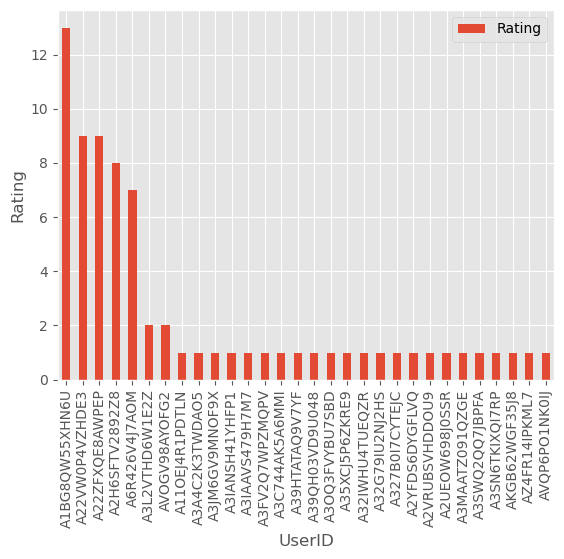

In [42]:
most_u.head(30).plot(kind = "bar",ylabel="Rating",xlabel="UserID")

In [ ]:
#Recommendation System :-Model-based collaborative filtering system


In [43]:
#Utility Matrix based on products sold and user reviews¶

# Subset of Amazon Ratings

data1 = data.head(100)

In [44]:
ratings_utility_matrix = data1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,1304196135,1304351475,1304482596,1304482634,1304482685,1304488608,1304495396,1304511073,1304511081,1304511111,130451112X,1304511138,1304511146,1304511154,1304622193,1304622223,1304622428,1304622452,1304622460,1304622622,1304622657,1304622665,1304624498,1304624544,1304651029,1304651088,130465110X,1304651118,1304651347,1304665704,1304665720,205616461,558925278,733001998,737104473,762451459
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A11OEJ4R1PDTLN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
A15THVWZS6GQZY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A169NC0ZW6XKRD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A19KEEVZYO1KO6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1BG8QW55XHN6U,5,0,0,5,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,5,0,0,0,5,5,5,5,0,5,0,0,0,0,0,0


In [45]:
ratings_utility_matrix.shape

(59, 49)

In [46]:
#Transposing the matrix

X = ratings_utility_matrix.T
X.head()

UserId,A11OEJ4R1PDTLN,A15THVWZS6GQZY,A169NC0ZW6XKRD,A19KEEVZYO1KO6,A1BG8QW55XHN6U,A1DC0DSF3H3BCW,A1E5CS6UI1LWQF,A1F6HRR58TQ2R0,A1GWD6BDCLGC82,A1LAW520BT5AM0,A1RGXKJ4RFIOCX,A1RXI3A1E99112,A1SWCNGOR3GMOQ,A1VCW66KPTNUV8,A1WMRR494NWEWV,A1YQUT1H2ENJ8U,A1Z513UWSAAO0F,A225CH9TTQPC4B,A22VW0P4VZHDE3,A22ZFXQE8AWPEP,A26QL1FBQO9C0E,A274NIJWOQWE30,A2D7CPCZH5VFVZ,A2F6NPTGDMFXN9,A2H6SFTV2892Z8,A2IOZRH02O4C9S,A2NRG4NQMLHDJQ,A2OMU0R0VM5O9I,A2UEOW698J0SSR,A2YFDS6DYGFLVQ,A327B0I7CYTEJC,A32G79IU2NJ2HS,A32IWHU4TUEQZR,A39HTATAQ9V7YF,A3A4C2K3TWDAO5,A3C744AK5A6MMI,A3FV2Q7WPZMQPV,A3IAAVS479H7M7,A3IANSH41YHFP1,A3JM6GV9MNOF9X,A3L2VTHD6W1E2Z,A3SWQ2QQ7JBPFA,A3TR91FJ4MNFY9,A3V3RE4132GKRO,A6R426V4J7AOM,A9ZNJ2AXPO652,AH344ZAN5GNOM,AIFAAVTUYHEHB,AJ85OD05LNNUY,AKA7T9TPISJ26,AKGB62WGF35J8,AKJHHD5VEH7VG,AN33X95J5460X,AO5JB67V93FBL,ASPJCWRXUOYYY,AVOGV98AYOFG2,AVQP6PO1NK0IJ,AZ4FR14IPKML7,AZWRTJPN7NXT
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0


In [47]:
X.shape

(49, 59)

In [48]:
#Unique products in subset of data

X1 = X

In [50]:
#Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(49, 10)

In [52]:
#Correlation Matrix¶
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(49, 49)

In [55]:
#Isolating Product ID # 1304511111 from the Correlation Matrix
#Assuming the customer buys Product ID # 1304511111 (randomly chosen)

X.index[22]


'1304511111'

In [60]:
#Index # of product ID purchased by customer

i = "1304511111"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

22

In [57]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(49,)

In [88]:
#Recommending top 5 highly correlated products in sequence¶
Recommend = list(X.index[correlation_product_ID > 0.70])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['1304622622', '1304622665', '1304624498', '733001998', '762451459']

In [116]:

show = Recommend[0:9]
# rows convert  columns
df1 = pd.DataFrame(show,columns =['PopularId'])
df

df2 = pd.DataFrame(data)

print(df1)
print("-------------------------------------------------------------------------------------")
print(df2)



    PopularId
0  1304622622
1  1304622665
2  1304624498
3   733001998
4   762451459
-------------------------------------------------------------------------------------
             UserId   ProductId  Rating   Timestamp  Prize     Campany
0    A39HTATAQ9V7YF   205616461       5  1369699200  13000      Amazon
1    A3JM6GV9MNOF9X   558925278       3  1355443200   1200     Fipkard
2    A1Z513UWSAAO0F   558925278       5  1404691200  23000      E-mart
3    A1WMRR494NWEWV   733001998       4  1382572800   4000      Myntra
4    A3IAAVS479H7M7   737104473       1  1274227200   3000    Snapdeal
..              ...         ...     ...         ...    ...         ...
128  A2BQ8DVGEGWAFY  1929099886       4  1355011200   2058      Myntra
129  A2A0EW34FZH9Z7  1987958179       5  1394755200   2059    Snapdeal
130  A1D6UAVLQUS41B  3222000565       5  1381449600   2060  AliExpress
131  A2VRUBSVHDDOU9  3222000565       5  1382486400   2061      Amazon
132  A276N142RFK6EF  3222000565       5  14043456

In [132]:


# Assuming `Recommend` is a DataFrame with the necessary data
show = Recommend[0:9]
df1 = pd.DataFrame(show, columns=['ProductId'])  # Create df1 with 'ProductId' column

df2 = pd.DataFrame(data)  # Assuming `data` is a DataFrame with the necessary data

compareColumn = []
for index, row in df1.iterrows():
    df2Row = df2[df2["ProductId"] == row["ProductId"]]  # Corrected column name
    if df2Row.shape[0] == 0:
        compareColumn.append("ID not available")
    else:
        check = False
        for jndex, row2 in df2Row.iterrows():
            if row2["ProductId"] == row["ProductId"]:  # Corrected column name
                compareColumn.append("Both matching")
                check = True
                break
        if check == False:
            compareColumn.append("Date not matching")

df1["PopularId"] = compareColumn
print(df1)


    ProductId      PopularId
0  1304622622  Both matching
1  1304622665  Both matching
2  1304624498  Both matching
3   733001998  Both matching
4   762451459  Both matching


In [141]:
#show all match ProductId' data fron data(df2)

# Assuming `Recommend` is a DataFrame with the necessary data
show = Recommend[0:9]
df1 = pd.DataFrame(show, columns=['ProductId'])  # Create df1 with 'ProductId' column

df2 = pd.DataFrame(data)  # Assuming `data` is a DataFrame with the necessary data

# Remove 'Rating' and 'Timestamp' columns from df2
df2 = df2.drop(columns=['Rating', 'Timestamp'])

matching_data = []

for index, row in df1.iterrows():
    df2Row = df2[df2["ProductId"] == row["ProductId"]]
    if not df2Row.empty:
        matching_data.append(df2Row)

if matching_data:
    matching_df = pd.concat(matching_data)
    print(matching_df)
else:
    print("No matching data found.")

compareColumn = []

for index, row in df1.iterrows():
    df2Row = df2[df2["ProductId"] == row["ProductId"]]
    if df2Row.shape[0] == 0:
        compareColumn.append("ID not available")
    else:
        check = False
        for jndex, row2 in df2Row.iterrows():
            if row2["ProductId"] == row["ProductId"]:
                compareColumn.append("Both matching")
                check = True
                break
        if not check:
            compareColumn.append("Date not matching")

df1["compare"] = compareColumn




            UserId   ProductId  Prize     Campany
79  A1VCW66KPTNUV8  1304622622   2009  AliExpress
80   AO5JB67V93FBL  1304622622   2010    Filpcard
81  A1GWD6BDCLGC82  1304622622   2011    Filpcard
86  A22ZFXQE8AWPEP  1304622665   2016    Filpcard
87  A22ZFXQE8AWPEP  1304624498   2017    Filpcard
88  A2IOZRH02O4C9S  1304624498   2018    Filpcard
3   A1WMRR494NWEWV   733001998   4000      Myntra
5    AKJHHD5VEH7VG   762451459   5000  AliExpress
